In [18]:
# import everything we need
from matplotlib import pyplot as plt
import csv
import json
import numpy as np
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import binom
import random
from collections import Counter
from collections import defaultdict

In [19]:
# Get data from two csv files. We will focus on input.csv first 
# and then use test.csv in our last problem (Q6)

def jprint(data):
    print(json.dumps(data, indent=4))

data=[]
with open('input.csv', encoding="utf-8") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        row["Temperature(F)"]=float(row["Temperature(F)"])
        row["Humidity(%)"]=float(row["Humidity(%)"])
        row["Pressure(in)"]=float(row["Pressure(in)"])
        row["Visibility(mi)"]=float(row["Visibility(mi)"])
        row["Severity"]=int(row["Severity"])
        data.append(row)
    jprint(data[:5])

test=[]
with open('test.csv', encoding="utf-8") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        row["Temperature(F)"]=float(row["Temperature(F)"])
        row["Visibility(mi)"]=float(row["Visibility(mi)"])
        row["Severity"]=int(row["Severity"])
        test.append(row)

[
    {
        "ID": "A-1000199",
        "Severity": 3,
        "State": "CA",
        "Timezone": "US/Pacific",
        "Temperature(F)": 96.54379516575581,
        "Humidity(%)": 67.04924289422331,
        "Pressure(in)": 31.21462071903163,
        "Visibility(mi)": 7.0,
        "Crossing": "False",
        "Stop": "False",
        "Traffic_Signal": "False",
        "Sunrise_Sunset": "Day"
    },
    {
        "ID": "A-1001335",
        "Severity": 3,
        "State": "KY",
        "Timezone": "US/Eastern",
        "Temperature(F)": 86.0,
        "Humidity(%)": 49.0,
        "Pressure(in)": 29.97,
        "Visibility(mi)": 6.0,
        "Crossing": "False",
        "Stop": "False",
        "Traffic_Signal": "False",
        "Sunrise_Sunset": "Day"
    },
    {
        "ID": "A-1001497",
        "Severity": 2,
        "State": "NC",
        "Timezone": "US/Eastern",
        "Temperature(F)": 80.0,
        "Humidity(%)": 46.0,
        "Pressure(in)": 30.08,
        "Visibility(mi)": 7

# Question 1

[
    {
        "TimeZone": "US/Central",
        "Temperature(F)_mean": 87.19953972892588,
        "Temperature(F)_std": 7.868193422517056,
        "Humidity(%)_mean": 49.16326005582558,
        "Humidity(%)_std": 12.533460527985383,
        "Pressure(in)_mean": 30.148477666362812,
        "Pressure(in)_std": 0.38423561157616337,
        "Visibility(mi)_mean": 6.29535095715588,
        "Visibility(mi)_std": 1.834957161009104
    },
    {
        "TimeZone": "US/Eastern",
        "Temperature(F)_mean": 86.91548630783758,
        "Temperature(F)_std": 8.340925052236157,
        "Humidity(%)_mean": 51.62889518413598,
        "Humidity(%)_std": 12.764431413603175,
        "Pressure(in)_mean": 30.279740321057606,
        "Pressure(in)_std": 0.4716514154671129,
        "Visibility(mi)_mean": 5.737960339943343,
        "Visibility(mi)_std": 1.9747542182074418
    },
    {
        "TimeZone": "US/Mountain",
        "Temperature(F)_mean": 87.15734313694053,
        "Temperature(F)_std": 8.4428

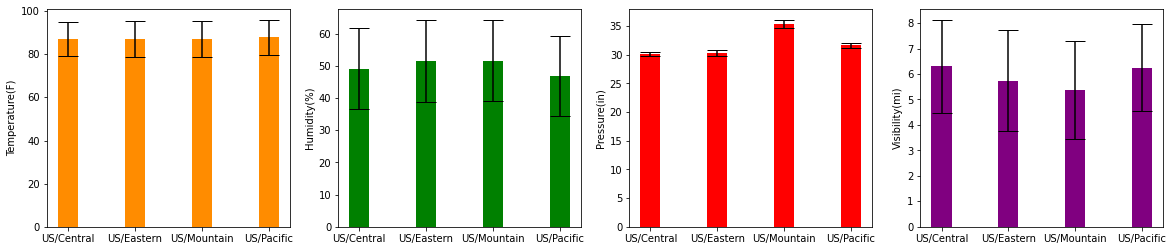

In [27]:
# PROBLEM DESCRIPTION:

# Calculate the means and standard deviations of temperature, visibility, 
# and wind speed grouped by different time zones. For each measurement,
# use bar charts to visualize means and standard deviations of 
# Temperature(F), Humidity(%), Pressure(in), and Visibility(mi) values of different time zones. 
# The bar heights are the mean values. Use error bars to show the standard deviations

# ---------------------------
attr = ["US/Central", "US/Eastern", "US/Mountain", "US/Pacific"]

# Building lists for each individual category
temp_means = []
temp_stds = []
humidity_means = []
humidity_stds = []
pressure_means = []
pressure_stds = []
visibility_means = []
visibility_stds = []

# using bar charts to visualize means and standard deviations of 
# Temperature(F), Humidity(%), Pressure(in), and Visibility(mi) values of different time zones

for zone in attr:
    temp = [j["Temperature(F)"] for j in data if j["Timezone"] == zone]
    temp_means.append(np.mean(temp))
    temp_stds.append(np.std(temp, ddof = 1))
    
    humidity = [j["Humidity(%)"] for j in data if j["Timezone"] == zone]
    humidity_means.append(np.mean(humidity))
    humidity_stds.append(np.std(humidity, ddof = 1))
    
    pressure = [j["Pressure(in)"] for j in data if j["Timezone"] == zone]
    pressure_means.append(np.mean(pressure))
    pressure_stds.append(np.std(pressure, ddof = 1))
    
    visibility = [j["Visibility(mi)"] for j in data if j["Timezone"] == zone]
    visibility_means.append(np.mean(visibility))
    visibility_stds.append(np.std(visibility, ddof = 1))

# Plotting the graphs
plt.figure(figsize = (20, 4))
plt.subplot(1, 4, 1)
plt.bar(attr, temp_means, yerr = temp_stds, color = 'darkorange', capsize = 10, width = 0.3)
plt.xticks()
plt.ylabel ("Temperature(F)")

plt.subplot(1, 4, 2)
plt.bar(attr, humidity_means, yerr = humidity_stds, color = 'green', capsize = 10, width = 0.3)
plt.xticks()
plt.ylabel ("Humidity(%)")

plt.subplot(1, 4, 3)
plt.bar(attr, pressure_means, yerr = pressure_stds, color = 'red', capsize = 10, width = 0.3)
plt.xticks()
plt.ylabel ("Pressure(in)")

plt.subplot(1, 4, 4)
plt.bar(attr, visibility_means, yerr = visibility_stds, color = 'purple', capsize = 10, width = 0.3)
plt.xticks()
plt.ylabel ("Visibility(mi)")
plt.savefig("question1.png")

# create a list that will hold our dictionary
result = []
for i, zone in enumerate(attr):
    answer_dict = {
        'TimeZone': zone,
        'Temperature(F)_mean': temp_means[i],
        'Temperature(F)_std': temp_stds[i],
        'Humidity(%)_mean': humidity_means[i],
        'Humidity(%)_std': humidity_stds[i],
        'Pressure(in)_mean': pressure_means[i],
        'Pressure(in)_std': pressure_stds[i],
        'Visibility(mi)_mean': visibility_means[i],
        'Visibility(mi)_std': visibility_stds[i]
    }
    result.append(answer_dict)
jprint(result)

# Question 2

[
    {
        "State": "CA",
        "Accident": 825,
        "Correlation": 0.3871633959697464
    },
    {
        "State": "TX",
        "Accident": 379,
        "Correlation": 0.38936632725972115
    },
    {
        "State": "FL",
        "Accident": 356,
        "Correlation": 0.40221999119199237
    }
]


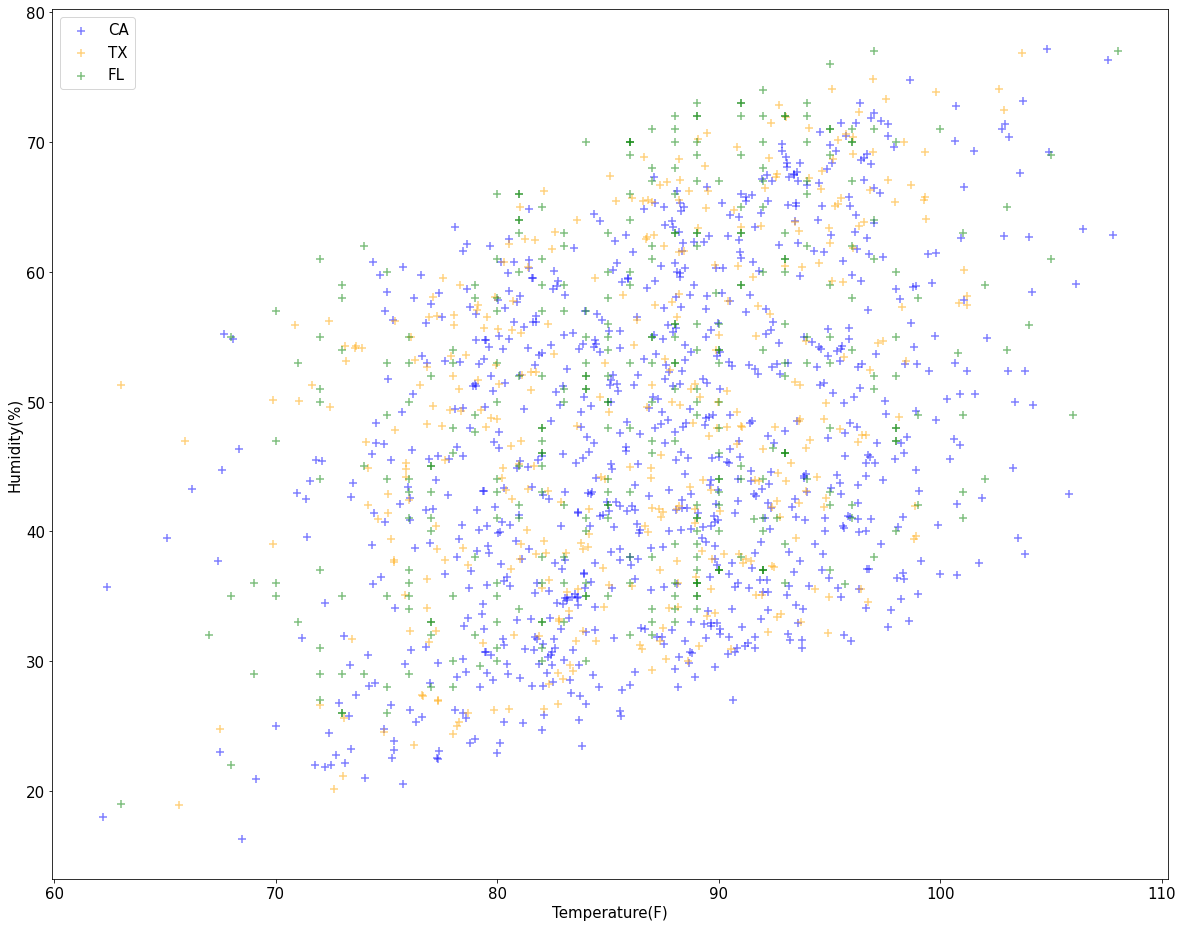

In [28]:
# PROBLEM DESCRIPTION:

# Visualize a scatter plot of temperature versus humidity of the top 3 states 
# that have the most accidents. You can assume there are at least 3 states
# and different states have a different number of cases.

# ------------------------------

# Visualize a scatter plot of temp vs humidity of the top 3 states with the most accidents
def q2_visual(ps):
    colors = ["blue", "orange", "green"]
    correlations = []
    plt.figure(figsize = (20, 16))
    plt.subplot(1, 1, 1) # first # - row, second # - column, third # - order in which it is shown
    for i, (state_name, accident_count) in enumerate(ps.items()):
        th_element = [(d["Temperature(F)"], d["Humidity(%)"]) for d in data if d["State"] == state_name]
        corr_mtx = np.corrcoef([d[0] for d in th_element], [d[1] for d in th_element])
        plt.scatter([g[0] for g in th_element], [g[1] for g in th_element], s = 50, c = colors[i], marker = "+", alpha = 0.5, label = state_name)
        correlations.append(corr_mtx)
        
    plt.legend(fontsize = 15)
    plt.xlabel("Temperature(F)", fontsize=15)
    plt.ylabel("Humidity(%)", fontsize=15)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.show()
    plt.savefig("question2.png")
    return correlations


# Get all the states and put them in a list
states = [d["State"] for d in data]

# Create a (state:count) dictionary
state_dict = Counter(states)

# popular_states will be a dict of 3 top states with their accident count numbers
popular_states = {k: v for k, v in sorted(state_dict.items(), key = lambda item: item[1], reverse = True)[:3]}

# calling the function that plots the graph for us, 
#outputs correlation values for the top three states as well
correlation = q2_visual(popular_states)

# create a list that will hold our dictionary
statesdict_list = []
for i, (k, v) in enumerate(popular_states.items()):
    states_dict = {"State": k, "Accident": v, "Correlation": correlation[i][0][1]}
    statesdict_list.append(states_dict)
    
jprint(statesdict_list)

# Question 3

{'AL': 45, 'AR': 7, 'AZ': 85, 'CA': 825, 'CO': 111, 'CT': 55, 'DC': 9, 'DE': 21, 'FL': 356, 'GA': 192, 'IA': 18, 'ID': 3, 'IL': 172, 'IN': 63, 'KS': 13, 'KY': 39, 'LA': 93, 'MA': 47, 'MD': 79, 'ME': 5, 'MI': 144, 'MN': 77, 'MO': 61, 'MS': 13, 'MT': 2, 'NC': 180, 'NE': 29, 'NH': 12, 'NJ': 94, 'NM': 8, 'NV': 16, 'NY': 250, 'OH': 118, 'OK': 62, 'OR': 105, 'PA': 141, 'RI': 16, 'SC': 171, 'SD': 1, 'TN': 77, 'TX': 379, 'UT': 54, 'VA': 133, 'VT': 1, 'WA': 90, 'WI': 57, 'WV': 4, 'WY': 2}


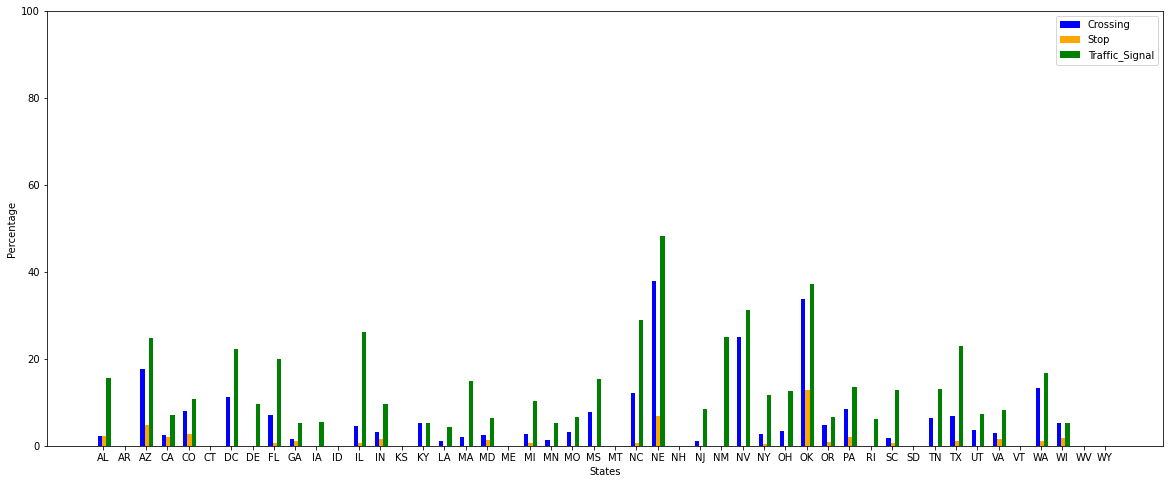

In [30]:
# PROBLEM DESCRIPTION:

# Visualize a clustered bar chart of percentages of accidents that happened at a 
# Crossing, Stop, and Traffic_Signal. Group the data by states. 
# Sort the states alphabetically on the x-axis. Each state has 3 clustered bars showing 
# the percentages of accidents at a Crossing, Stop, and Traffic_Signal. 
# Note not all 50 states have records in the data. Your visualization should be 
# dynamically configured to only show the states that have accidents in the data

# --------------------------
def q3_visual(al):
    
    # Building the lists that will contain the appropriate values
    state_values = []
    crossing_values = []
    stop_values = []
    traffic_signals = []
    
    # Appending the appropriate values into each of the above lists
    for d in al:
        state_values.append(d["State"]) # x
        crossing_values.append(d["Crossing"]) # y1
        stop_values.append(d["Stop"]) # y2
        traffic_signals.append(d["Traffic_Signal"]) # y3
    
    x_values = range(len(state_values))
    
    # Creating the graph
    w = 0.2
    plt.figure(figsize = (20, 8))
    plt.bar([x - 0.8 * w for x in x_values], crossing_values, color = "blue", width = w, label = "Crossing")
    plt.bar([x + 0.2 * w for x in x_values], stop_values, color = "orange", width = w, label = "Stop")
    plt.bar([x + 1.2 * w for x in x_values], traffic_signals, color = "green", width = w, label = "Traffic_Signal")

    x_ticks = state_values
    plt.xticks(x_values, x_ticks)
    plt.ylim(0, 100)
    plt.legend(loc = "best")
    plt.yticks(np.arange(0, 120, 20))
    plt.xlabel("States")
    plt.ylabel("Percentage")

    # Saving the graph
    plt.savefig('question3.png')


# Get all the states and put them in a list
states = [d["State"] for d in data]
state_dict = Counter(states)

state_accident = {k: v for k, v in sorted(state_dict.items(), key = lambda item: item[0], reverse = False)}

print(state_accident)

# building state:accident dictionary
accidents_list = []
for state_name, state_count in state_accident.items():
    crossings = len([d["Crossing"] for d in data if d["Crossing"] == "True" and d["State"] == state_name])/state_count 
    stop = len([d["Stop"] for d in data if d["Stop"] == "True" and d["State"] == state_name])/state_count
    traffic_signals = len([d["Traffic_Signal"] for d in data if d["Traffic_Signal"] == "True" and d["State"] == state_name])/state_count
    
    accidents_prob = {"State": state_name, "Crossing": crossings * 100, "Stop": stop * 100, "Traffic_Signal": traffic_signals * 100}
    accidents_list.append(accidents_prob)

accidents_list

# Calling Visualization graph
q3_visual(accidents_list)

# Question 4

[{'answer': 0.33761298601059053}]


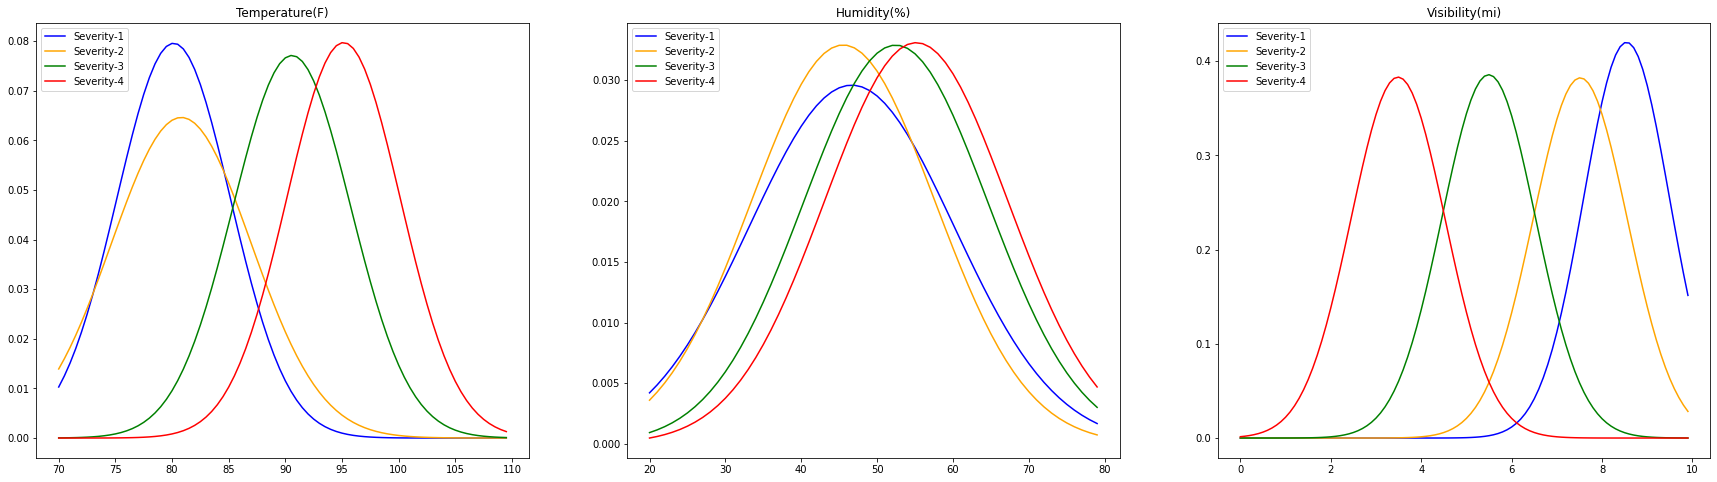

In [23]:
# PROBLEM DESCRIPTION:

# Visualize the PDF function of the distributions of Temperature(F), Humidity(%), and Visibility(mi) 
# by severity. You can assume each severity level has at least 30 records. 
# Then calculate given an accident happens when Temperature = 90F, Humidity is 60%-70%, and Visibility = 4, 
# what is the probability of this accident to be severity level 4?

# ----------------------
def q4_visual():
    
    # Creating four lists that will hold the values for severity 1, 2, 3 and 4
    severity1 = [d for d in data if d["Severity"] == 1]
    severity2 = [d for d in data if d["Severity"] == 2]
    severity3 = [d for d in data if d["Severity"] == 3]
    severity4 = [d for d in data if d["Severity"] == 4]

    plt.figure(figsize = (30, 8))

    temp_dict = [{"Severity": severity1, "Color": 'b-', "Label": "Severity-1"},
                 {"Severity": severity2, "Color": 'orange', "Label": "Severity-2"}, 
                 {"Severity": severity3, "Color": 'g-', "Label": "Severity-3"}, 
                 {"Severity": severity4, "Color": 'r-', "Label": "Severity-4"}]

    plt.subplot(1, 3, 1)
    xs = np.arange(70, 110, 0.5)
    for td in temp_dict: 
        mean = np.mean([d["Temperature(F)"] for d in td["Severity"]])
        std = np.std([d["Temperature(F)"] for d in td["Severity"]], ddof = 1)
        plt.plot(xs, norm.pdf(xs, mean, std), td["Color"], label = td["Label"])
    plt.legend(loc = 'upper left')
    plt.title("Temperature(F)")
    
    plt.subplot(1, 3, 2)
    xs = np.arange(20, 80, 1)
    for td in temp_dict: 
        mean = np.mean([d["Humidity(%)"] for d in td["Severity"]])
        std = np.std([d["Humidity(%)"] for d in td["Severity"]], ddof = 1)
        plt.plot(xs, norm.pdf(xs, mean, std), td["Color"], label = td["Label"])
    plt.legend(loc = 'upper left')
    plt.title("Humidity(%)")
    
    plt.subplot(1, 3, 3)
    xs = np.arange(0, 10, 0.1)
    for td in temp_dict: 
        mean = np.mean([d["Visibility(mi)"] for d in td["Severity"]])
        std = np.std([d["Visibility(mi)"] for d in td["Severity"]], ddof = 1)
        plt.plot(xs, norm.pdf(xs, mean, std), td["Color"], label = td["Label"])
    plt.legend(loc = 'upper left')
    plt.title("Visibility(mi)")
    
    #plt.show()
    plt.savefig('question4.png')
    
# calling the visualization function
q4_visual()


# E = S4
# F = (t, h, v)
# P(E|F) = (((P(F|E) * P(E))/P(F))
# P(S4|t, h, v) = P((t, h, v)|S4) * P(S4)/P(t, h, v)
# P(S4|t, h, v) = (P(t|S4) * P(h|S4) * P(v|S4)) * P(S4) / (P(t) * P(h) * P(v))

def q4_ProbOfAccidentForS4GivenX(temp, humidityLow, humidityHigh, visibility):
    accidents_s4 = [d for d in data if d["Severity"] == 4]
    # P(t|S4)
    temp_mean = np.mean([d["Temperature(F)"] for d in accidents_s4])
    temp_std = np.std([d["Temperature(F)"] for d in accidents_s4], ddof = 1)
    p_TempgivenS4 = norm.pdf(temp, temp_mean, temp_std)
    
    # P(h|S4)
    humidity_mean = np.mean([d["Humidity(%)"] for d in accidents_s4])
    humidity_std = np.std([d["Humidity(%)"] for d in accidents_s4], ddof = 1)
    p_HumiditygivenS4 = norm.cdf(humidityHigh, humidity_mean, humidity_std) - norm.cdf(humidityLow, humidity_mean, humidity_std)
    
    #P(v|S4)
    visibility_mean = np.mean([d["Visibility(mi)"] for d in data])
    visibility_std = np.std([d["Visibility(mi)"] for d in data], ddof = 1)
    p_VisibilitygivenS4 = norm.pdf(visibility, visibility_mean, visibility_std)
    
    #P(S4)
    p_S4 = len(accidents_s4)/len(data)
    
    #P(t)
    temp_mean = np.mean([d["Temperature(F)"] for d in data])
    temp_std = np.std([d["Temperature(F)"] for d in data], ddof = 1)
    p_Temp = norm.pdf(temp, temp_mean, temp_std)
    
    #P(h)
    humidity_mean = np.mean([d["Humidity(%)"] for d in data])
    humidity_std = np.std([d["Humidity(%)"] for d in data], ddof = 1)
    p_Humidity = norm.cdf(humidityHigh, humidity_mean, humidity_std) - norm.cdf(humidityLow, humidity_mean, humidity_std)
    
    #P(v)
    visibility_mean = np.mean([d["Visibility(mi)"] for d in data])
    visibility_std = np.std([d["Visibility(mi)"] for d in data], ddof = 1)
    p_Visibility = norm.pdf(visibility, visibility_mean, visibility_std)
    
    # P(S4|t, h, v) = P((t, h, v)|S4) * P(S4)/P(t, h, v)
    probOfAccidentForS4GivenX = ((p_TempgivenS4 * p_HumiditygivenS4 * p_VisibilitygivenS4 * p_S4) / (p_Temp * p_Humidity * p_Visibility))
    return probOfAccidentForS4GivenX

final_answer = q4_ProbOfAccidentForS4GivenX(90, 60, 70, 4)

answer_dict = [{"answer": final_answer}]

print(answer_dict)

# Question 5

In [24]:
# DESCRIPTION OF PROBLEM

#Assume any two accidents have the same probability to be one of the 
# severity levels 1, 2, 3, or 4, and any two accidents have the same probability
# to happen either during the day or at night. Accident severity level and Sunrise_Sunset 
# are independent of each other. For any data set with 100 accidents, 
# what is the probability that more than 60% of them are severity level 1 or 2 
# and at the same time more than 70% of them happened during the day?

# -------------------------------
accidents = 100
target_severity = 60
target_day = 70
p_S1orS2 = len([d["Severity"] for d in data if d["Severity"] == 1 or d["Severity"] == 2])/len(data)
#print(p_S1orS2)
p_Day = len([d["Sunrise_Sunset"] for d in data if d["Sunrise_Sunset"] == "Day"])/len(data)
#print(p_Day)
p_60_s1_s2 = 1 - binom.cdf(target_severity, accidents, p_S1orS2)
p_70_day = 1 - binom.cdf(target_day, accidents, p_Day)
final_result = p_60_s1_s2 * p_70_day * 100

answer_dict = [{"answer": final_result}]

print(answer_dict)

[{'answer': 0.06218801972410734}]


# Question 6

In [31]:
# DESCRIPTION OF PROBLEM: # Build a Naive Bayes classifier function to predict severity by 
# Temperature(F), Visibility(mi), and Sunrise_Sunset. 
# Use the classifier to predict the data in test.csv. 
# Sort the data by the ascending order of ID

# ------------------------------------------------
# E = S1 or (S2 or S3 or S4)
# F = (t, v, s)
# P(E|F) = (((P(F|E) * P(E))/P(F))
# P(S|t, v, s) = P((t, v, s)|S) * P(S)
# P(S|t, v, s) = (P(t|S) * P(v|S) * P(s|S)) * P(S)

# Calculates factor of severity given an X value by taking in 3 parameters for a specified severity, where
# accidents is a list of records for a specified severity
def q6_factor_of_severity_given_X(accidents, temp, visibility, sun):
    temp_list = []
    visibility_list = []
    sun_list = []
    
    # Builds 3 lists in one loop to optimize for performance
    for d in accidents:
        temp_list.append(d["Temperature(F)"])
        visibility_list.append(d["Visibility(mi)"])
        if (d["Sunrise_Sunset"] == sun):
            sun_list.append(d["Sunrise_Sunset"])
            
    
    # P(t|S)
    temp_mean = np.mean(temp_list)
    temp_std = np.std(temp_list, ddof = 1)
    p_TempgivenS = norm.pdf(temp, temp_mean, temp_std)
    
    #P(v|S)
    visibility_mean = np.mean(visibility_list)
    visibility_std = np.std(visibility_list, ddof = 1)
    p_VisibilitygivenS = norm.pdf(visibility, visibility_mean, visibility_std)
    
    #P(s|S)
    p_SungivenS = len(sun_list)/len(accidents)
    
    #P(S)
    p_S = len(accidents)/len(data)
    
    # Final equation to get factor of severity for a given x
    factorOfSeverityForGivenX = p_TempgivenS * p_VisibilitygivenS * p_SungivenS * p_S
    
    return factorOfSeverityForGivenX

# Finds the index of the largest value: 1, 2, 3 or 4
def findMax(a1, a2, a3, a4):
    # Check for which given numbers is the largest and assign it to "a"
    a = a1
    if (a < a2):
        a = a2
    if (a < a3):
        a = a3
    if (a < a4):
        a = a4
    
    # Returns number for largest "a"
    if (a == a1):
        return 1
    if (a == a2):
        return 2
    if (a == a3):
        return 3
    if (a == a4):
        return 4

# Returns the most likely severity given X: temp, visibility, sun.
def q6_naive_bayes_classifier(temp, visibility, sun):
    accidentsGivenSeverity1 = []
    accidentsGivenSeverity2 = []
    accidentsGivenSeverity3 = []
    accidentsGivenSeverity4 = []
    
    # create four lists holding values for severity 1, 2, 3, 4
    for d in data:
        if (d["Severity"] == 1):
            accidentsGivenSeverity1.append(d)
        if (d["Severity"] == 2):
            accidentsGivenSeverity2.append(d)
        if (d["Severity"] == 3):
            accidentsGivenSeverity3.append(d)
        if (d["Severity"] == 4):
            accidentsGivenSeverity4.append(d)
    
    # Gets the values for each severity level
    s1 = q6_factor_of_severity_given_X(accidentsGivenSeverity1, temp, visibility, sun)
    s2 = q6_factor_of_severity_given_X(accidentsGivenSeverity2, temp, visibility, sun)
    s3 = q6_factor_of_severity_given_X(accidentsGivenSeverity3, temp, visibility, sun)
    s4 = q6_factor_of_severity_given_X(accidentsGivenSeverity4, temp, visibility, sun)
    
    # returns the index of the largest value: 1, 2, 3 or 4
    return findMax(s1, s2, s3, s4)

# Create our dictionary to prepare to put everything into a CSV file
severity_list = []

# predict data on test.csv file
for d in test:
    severity_prediction = {"ID": d["ID"], "prediction": q6_naive_bayes_classifier(d["Temperature(F)"], d["Visibility(mi)"], d["Sunrise_Sunset"])}
    severity_list.append(severity_prediction)
jprint(severity_list[:10])

[
    {
        "ID": "A-1002576",
        "prediction": 2
    },
    {
        "ID": "A-1006568",
        "prediction": 2
    },
    {
        "ID": "A-1009958",
        "prediction": 3
    },
    {
        "ID": "A-1010670",
        "prediction": 2
    },
    {
        "ID": "A-1011694",
        "prediction": 3
    },
    {
        "ID": "A-1016859",
        "prediction": 3
    },
    {
        "ID": "A-1020297",
        "prediction": 3
    },
    {
        "ID": "A-1021743",
        "prediction": 2
    },
    {
        "ID": "A-102293",
        "prediction": 2
    },
    {
        "ID": "A-1027803",
        "prediction": 3
    }
]
